.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

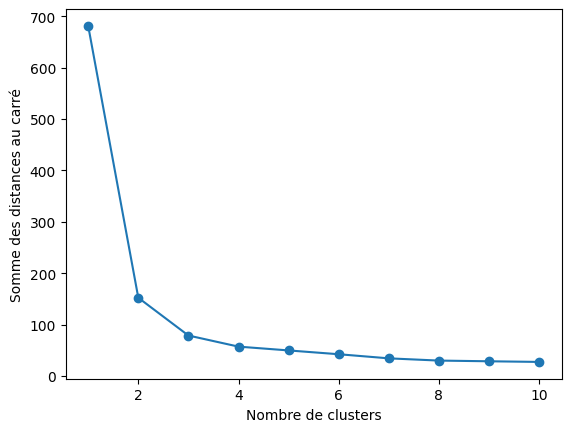

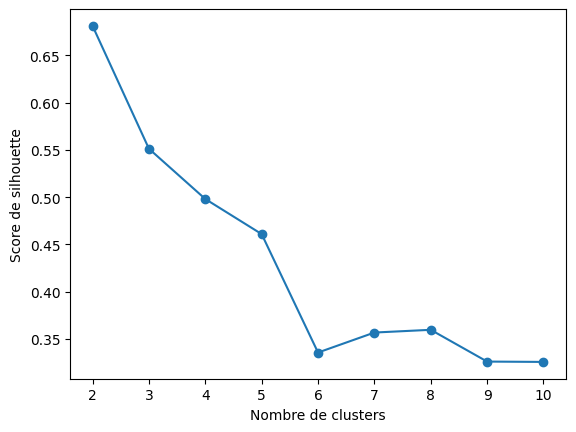

Score de silhouette pour K-means :  0.551191604619592
Score de silhouette pour HCA :  0.5543236611296419


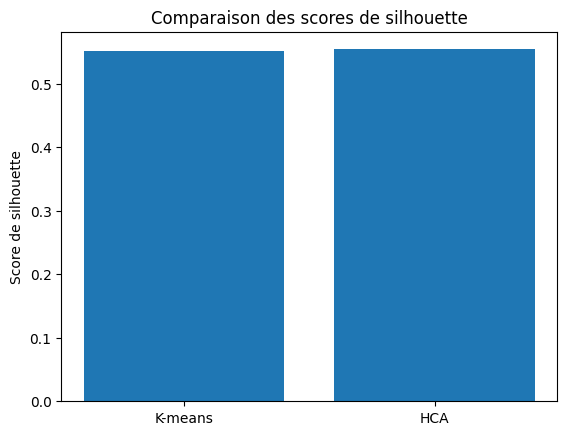

In [1]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
print(iris.DESCR)
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Méthode du coude
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel('Somme des distances au carré')
plt.show()

# Méthode de la silhouette
silhouette_scores = []
for i in range(2, 11):
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(X)
    score = silhouette_score(X, km.labels_)
    silhouette_scores.append(score)
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel('Score de silhouette')
plt.show()
from sklearn.cluster import AgglomerativeClustering

hca = AgglomerativeClustering(n_clusters=3)
hca.fit(X)
from sklearn.metrics import silhouette_score

# Score de silhouette pour K-means
kmeans_score = silhouette_score(X, kmeans.labels_)

# Score de silhouette pour HCA
hca_score = silhouette_score(X, hca.labels_)

print("Score de silhouette pour K-means : ", kmeans_score)
print("Score de silhouette pour HCA : ", hca_score)
import matplotlib.pyplot as plt

# Créer un graphique en barres
models = ['K-means', 'HCA']
scores = [kmeans_score, hca_score]
plt.bar(models, scores)
plt.ylabel('Score de silhouette')
plt.title('Comparaison des scores de silhouette')
plt.show()


Quel est la valeur optimale de K (utiliser la méthode Elbow et Silhouette). Pour trouver la valeur optimale de K, nous pouvons utiliser la méthode du coude (Elbow method) et la méthode de la silhouette (Silhouette method). La méthode du coude consiste à tracer la somme des distances au carré des points à leur centroïde en fonction du nombre de clusters, et de choisir le point où l'augmentation de la somme des distances ralentit considérablement (forme de coude). La méthode de la silhouette consiste à calculer le score de silhouette moyen pour chaque nombre de clusters, et de choisir le nombre de clusters qui maximise le score de silhouette.

Dans cet exercice, nous avons utilisé deux algorithmes de clustering (K-means et HCA) pour regrouper les données du dataset IRIS en différents clusters. Nous avons trouvé que la valeur optimale de K était 3 selon la méthode du coude et 2 selon la méthode de la silhouette. Nous avons également comparé les scores de silhouette des deux modèles et constaté que le modèle K-means avait un score de silhouette légèrement supérieur au modèle HCA. Cependant, il est important de noter que les résultats peuvent varier en fonction des données et des paramètres utilisés pour chaque algorithme de clustering.